In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_rand_score

In [26]:
data = pd.read_csv("data/nyra_2019_complete.csv",names=['track_id','race_date','race_number','program_number','trakus_index','latitude','longitude','distance_id','course_type','track_condition','run_up_distance','race_type','purse','post_time','weight_carried','jockey','odds','position_at_finish'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [51]:
data

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000.0,420,120,Andre Shivnarine Worrie,2090,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5228425,AQU,2019-11-23,9,2,167,40.672363,-73.830853,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228426,AQU,2019-11-23,9,2,168,40.672321,-73.830873,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228427,AQU,2019-11-23,9,2,169,40.672281,-73.830893,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9
5228428,AQU,2019-11-23,9,2,170,40.672240,-73.830913,1100,T,GD,72,STK,200000.0,353,124,Joel Rosario,1120,9


In [53]:
# Drop features which probably do not contribute
data_important_features = data.drop(['race_date', 'race_number', 'purse', 'post_time', 'latitude', 'longitude','trakus_index'],axis=1)
data_important_features

,track_id,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,weight_carried,jockey,odds,position_at_finish
0,AQU,6,600,D,GD,48,CLM,120,Andre Shivnarine Worrie,2090,8
1,AQU,6,600,D,GD,48,CLM,120,Andre Shivnarine Worrie,2090,8
2,AQU,6,600,D,GD,48,CLM,120,Andre Shivnarine Worrie,2090,8
3,AQU,6,600,D,GD,48,CLM,120,Andre Shivnarine Worrie,2090,8
4,AQU,6,600,D,GD,48,CLM,120,Andre Shivnarine Worrie,2090,8
...,...,...,...,...,...,...,...,...,...,...,...
5228425,AQU,2,1100,T,GD,72,STK,124,Joel Rosario,1120,9
5228426,AQU,2,1100,T,GD,72,STK,124,Joel Rosario,1120,9
5228427,AQU,2,1100,T,GD,72,STK,124,Joel Rosario,1120,9
5228428,AQU,2,1100,T,GD,72,STK,124,Joel Rosario,1120,9


In [57]:
# Drop duplicates
cleaned = data_important_features.drop_duplicates()
# Separate Features and Target
target_variable = cleaned['position_at_finish']
cleaned = cleaned.drop('position_at_finish', axis=1)
cleaned

,track_id,program_number,distance_id,course_type,track_condition,run_up_distance,race_type,weight_carried,jockey,odds
0,AQU,6,600,D,GD,48,CLM,120,Andre Shivnarine Worrie,2090
297,AQU,2,600,O,FM,58,CLM,120,Manuel Franco,335
572,BEL,9,600,I,FM,90,AOC,121,Dylan Davis,2525
845,BEL,6,600,I,FM,112,CLM,123,Manuel Franco,1300
1125,SAR,6,550,T,GD,74,CLM,122,Irad Ortiz Jr.,1210
...,...,...,...,...,...,...,...,...,...,...
5226195,AQU,3,600,O,YL,56,STK,120,Joel Rosario,560
5226482,BEL,9,600,I,YL,126,STK,120,Manuel Franco,990
5226784,BEL,5,1200,T,GD,63,STK,122,Flavien Prat,1910
5227338,BEL,4,1200,T,GD,63,STK,122,Tony Piccone,3825


In [58]:
# One Hot Encode Categorical data
categorical = {'Category': ['track_id', 'program_number', 'course_type', 'track_condition', 'race_type', 'jockey']}
# Use get_dummies to perform one-hot encoding
df_encoded = pd.get_dummies(cleaned, columns=categorical['Category'])

df_encoded

,distance_id,run_up_distance,weight_carried,odds,track_id_AQU,track_id_BEL,track_id_SAR,program_number_1,program_number_2,program_number_3,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,program_number_10,program_number_11,program_number_12,program_number_13,program_number_14,program_number_15,program_number_16,program_number_1,program_number_10,program_number_11,program_number_12,program_number_13,program_number_14,program_number_15,program_number_16,program_number_1A,program_number_1X,program_number_2,program_number_2B,program_number_3,program_number_3X,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,course_type_D,course_type_I,course_type_M,course_type_O,course_type_T,track_condition_FM,track_condition_FT,track_condition_GD,track_condition_MY,track_condition_SF,track_condition_SY,track_condition_YL,race_type_ALW,race_type_AOC,race_type_CLM,race_type_MCL,race_type_MSW,race_type_SHP,race_type_SOC,race_type_SST,race_type_STK,race_type_STR,race_type_WCL,race_type_WMC,jockey_Abner Adorno,jockey_Adam Beschizza,jockey_Adam Bowman,jockey_Adrian Flores,jockey_Alex Cintron,jockey_Andre Shivnarine Worrie,jockey_Andrea Atzeni,jockey_Andrea C. Rodriguez,jockey_Andrew Wolfsont,jockey_Angel Castillo,jockey_Angel Cruz,jockey_Angel R. Rodriguez,jockey_Angel Suarez,jockey_Anthony Salgado,jockey_Antonio A. Gallardo,jockey_Arienne Cox,jockey_Barry Foley,jockey_Ben Curtis,jockey_Benjamin Hernandez,jockey_Bernard Dalton,jockey_Brian Joseph Hernandez Jr.,jockey_Carlos J. Hernandez,jockey_Carol Cedeno,jockey_Channing Hill,jockey_Charles C. Lopez,jockey_Charlie Amaro,jockey_Chris Landeros,jockey_Christian Santiago Reyes,jockey_Christophe Soumillon,jockey_Christopher P. DeCarlo,jockey_Corey J. Lanerie,jockey_Cory Orm,jockey_Cristina Bonilla,jockey_Daisuke Fukumoto,jockey_Dalton Brown,jockey_Dana G. Whitney,jockey_Daniel Centeno,jockey_Danny Mullins,jockey_Darren Nagle,jockey_David Cohen,jockey_Declan Cannon,jockey_Declan Carroll,jockey_Dylan Davis,jockey_Dyn Panell,jockey_Edgar S. Prado,jockey_Edward Escobar,jockey_Edwin Rivera,jockey_Emanuel De Diego,jockey_Emisael Jaramillo,jockey_Emmanuel Esquivel,jockey_Eric Cancel,jockey_Erick Lopez,jockey_Feargal Lynch,jockey_Flavien Prat,jockey_Florent Geroux,jockey_Forest Boyce,jockey_Frankie Pennington,jockey_Gary Richards,jockey_Gavin Coetzee,jockey_Georgina Sergeon,jockey_Gerard Galligan,jockey_Graham Watters,jockey_Grant Whitacre,jockey_Harry Hernandez,jockey_Hector Rafael Diaz Jr.,jockey_Heman K. Harkie,jockey_Irad Ortiz Jr.,jockey_J. D. Acosta,jockey_Jack Doyle,jockey_Jaime Rodriguez,jockey_Jamie P. Spencer,jockey_Javier Castellano,jockey_Jeffrey Sanchez,jockey_Jeremias Flores,jockey_Jeremy Rose,jockey_Jevian Toledo,jockey_Joe Bravo,jockey_Joel Rosario,jockey_Joel Sone,jockey_Joey R. Martinez,jockey_Johan Rosado,jockey_John Bisono,jockey_John R. Velazquez,jockey_Jomar Garcia,jockey_Jomar Torres,jockey_Jorge A. Vargas Jr.,jockey_Jorge L. Vargas Jr.,jockey_Jorge M. Perez,jockey_Jorge Ruiz,jockey_Jose A. Bracho,jockey_Jose Angel Garcia,jockey_Jose Antonio Gallego,jockey_Jose Baez,jockey_Jose C. Ferrer,jockey_Jose F. Rojas,jockey_Jose L. Ortiz,jockey_Jose Lezcano,jockey_Jose R. Betancourt,jockey_Joseph Talamo,jockey_Jozef Bojko,jockey_Julian Pimentel,jockey_Julien R. Leparoux,jockey_Julio Correa,jockey_Junior Alvarado,jockey_Katie Davis,jockey_Keivan Serrano,jockey_Kendrick Carmouche,jockey_Kevin Carmona,jockey_Kevin Gomez,jockey_Kieran Norris,jockey_Kirk Johnson,jockey_Kody Kellenberger,jockey_Leonardo Corujo,jockey_Leonel Reyes,jockey_Luca Panici,jockey_Luis A. Rodriguez Castro,jockey_Luis Cardenas,jockey_Luis R. Reyes,jockey_Luis Saez,jockey_Manuel Franco,jockey_Mario Gutierrez,jockey_Mark Watts,jockey_Martin Chuan,jockey_Michael Hussey,jockey_Michael J. Luzzi,jockey_Michael Mitchell,jockey_Miguel A. Melendez,jockey_Mike E. Smith,jockey_Miyabi Muto,jockey_Mychel J. Sanchez,jockey_Nathan Vickers,jo

In [42]:
cols = df_encoded.columns
for c in cols:
    print(c)

distance_id
run_up_distance
weight_carried
odds
track_id_AQU
track_id_BEL
track_id_SAR
program_number_1
program_number_2
program_number_3
program_number_4
program_number_5
program_number_6
program_number_7
program_number_8
program_number_9
program_number_10
program_number_11
program_number_12
program_number_13
program_number_14
program_number_15
program_number_16
program_number_1  
program_number_10 
program_number_11 
program_number_12 
program_number_13 
program_number_14 
program_number_15 
program_number_16 
program_number_1A 
program_number_1X 
program_number_2  
program_number_2B 
program_number_3  
program_number_3X 
program_number_4  
program_number_5  
program_number_6  
program_number_7  
program_number_8  
program_number_9  
course_type_D
course_type_I
course_type_M
course_type_O
course_type_T
track_condition_FM 
track_condition_FT 
track_condition_GD 
track_condition_MY 
track_condition_SF 
track_condition_SY 
track_condition_YL 
race_type_ALW
race_type_AOC
race_type_CLM
ra

###### Investigate Correlation

In [31]:
correlation_matrix = df_encoded.corr()

In [34]:
correlation_matrix_filtered = correlation_matrix.abs() > 0.2

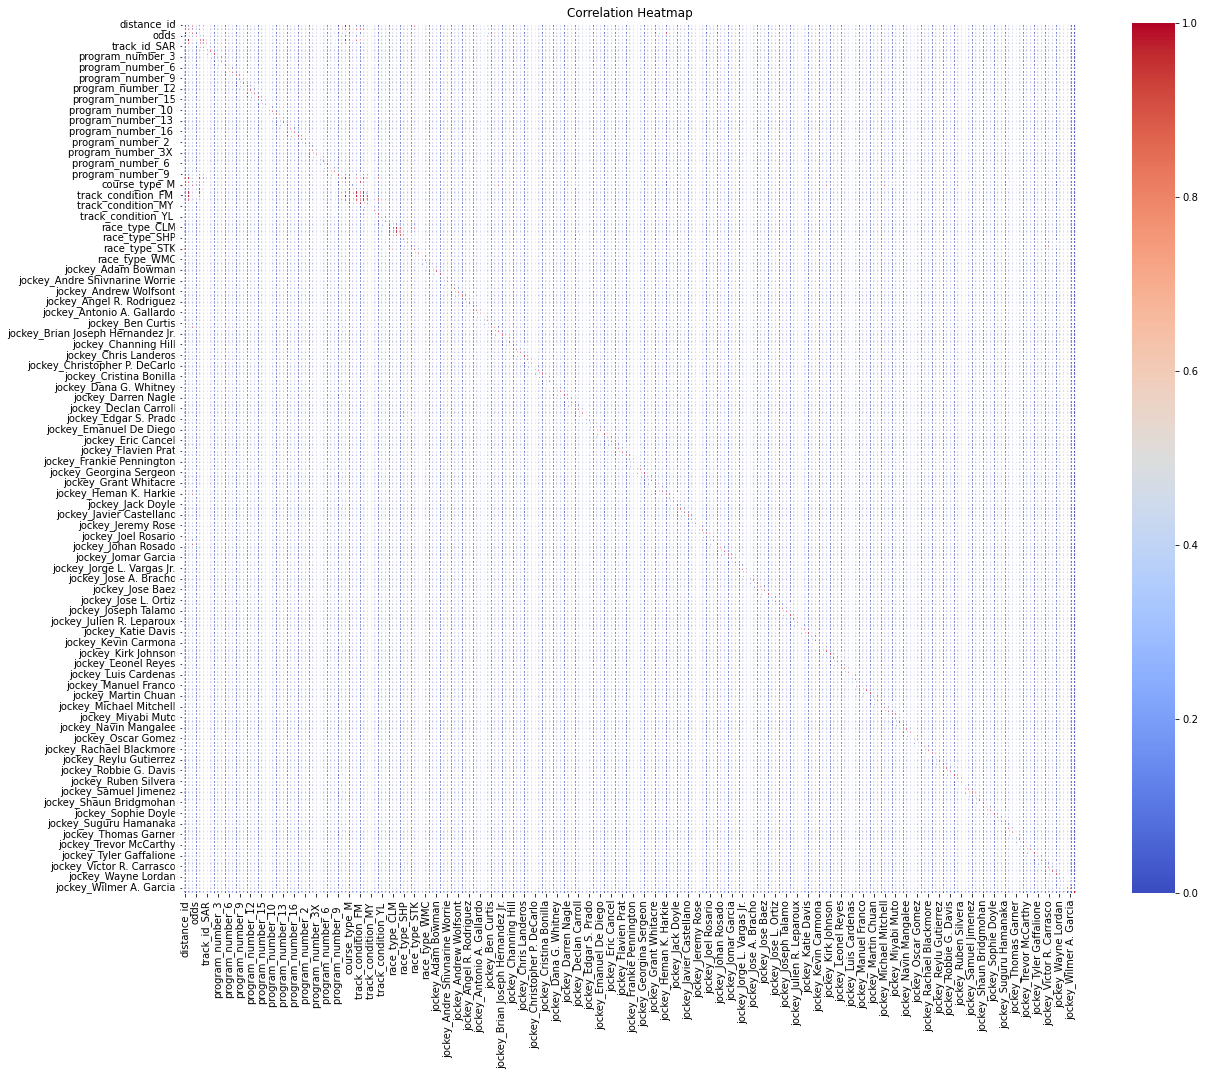

In [35]:
import seaborn as sns
# Create a heatmap using seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [43]:
pd.set_option('display.max_columns', None)
correlation_matrix_filtered

,distance_id,run_up_distance,weight_carried,odds,track_id_AQU,track_id_BEL,track_id_SAR,program_number_1,program_number_2,program_number_3,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,program_number_10,program_number_11,program_number_12,program_number_13,program_number_14,program_number_15,program_number_16,program_number_1,program_number_10,program_number_11,program_number_12,program_number_13,program_number_14,program_number_15,program_number_16,program_number_1A,program_number_1X,program_number_2,program_number_2B,program_number_3,program_number_3X,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,course_type_D,course_type_I,course_type_M,course_type_O,course_type_T,track_condition_FM,track_condition_FT,track_condition_GD,track_condition_MY,track_condition_SF,track_condition_SY,track_condition_YL,race_type_ALW,race_type_AOC,race_type_CLM,race_type_MCL,race_type_MSW,race_type_SHP,race_type_SOC,race_type_SST,race_type_STK,race_type_STR,race_type_WCL,race_type_WMC,jockey_Abner Adorno,jockey_Adam Beschizza,jockey_Adam Bowman,jockey_Adrian Flores,jockey_Alex Cintron,jockey_Andre Shivnarine Worrie,jockey_Andrea Atzeni,jockey_Andrea C. Rodriguez,jockey_Andrew Wolfsont,jockey_Angel Castillo,jockey_Angel Cruz,jockey_Angel R. Rodriguez,jockey_Angel Suarez,jockey_Anthony Salgado,jockey_Antonio A. Gallardo,jockey_Arienne Cox,jockey_Barry Foley,jockey_Ben Curtis,jockey_Benjamin Hernandez,jockey_Bernard Dalton,jockey_Brian Joseph Hernandez Jr.,jockey_Carlos J. Hernandez,jockey_Carol Cedeno,jockey_Channing Hill,jockey_Charles C. Lopez,jockey_Charlie Amaro,jockey_Chris Landeros,jockey_Christian Santiago Reyes,jockey_Christophe Soumillon,jockey_Christopher P. DeCarlo,jockey_Corey J. Lanerie,jockey_Cory Orm,jockey_Cristina Bonilla,jockey_Daisuke Fukumoto,jockey_Dalton Brown,jockey_Dana G. Whitney,jockey_Daniel Centeno,jockey_Danny Mullins,jockey_Darren Nagle,jockey_David Cohen,jockey_Declan Cannon,jockey_Declan Carroll,jockey_Dylan Davis,jockey_Dyn Panell,jockey_Edgar S. Prado,jockey_Edward Escobar,jockey_Edwin Rivera,jockey_Emanuel De Diego,jockey_Emisael Jaramillo,jockey_Emmanuel Esquivel,jockey_Eric Cancel,jockey_Erick Lopez,jockey_Feargal Lynch,jockey_Flavien Prat,jockey_Florent Geroux,jockey_Forest Boyce,jockey_Frankie Pennington,jockey_Gary Richards,jockey_Gavin Coetzee,jockey_Georgina Sergeon,jockey_Gerard Galligan,jockey_Graham Watters,jockey_Grant Whitacre,jockey_Harry Hernandez,jockey_Hector Rafael Diaz Jr.,jockey_Heman K. Harkie,jockey_Irad Ortiz Jr.,jockey_J. D. Acosta,jockey_Jack Doyle,jockey_Jaime Rodriguez,jockey_Jamie P. Spencer,jockey_Javier Castellano,jockey_Jeffrey Sanchez,jockey_Jeremias Flores,jockey_Jeremy Rose,jockey_Jevian Toledo,jockey_Joe Bravo,jockey_Joel Rosario,jockey_Joel Sone,jockey_Joey R. Martinez,jockey_Johan Rosado,jockey_John Bisono,jockey_John R. Velazquez,jockey_Jomar Garcia,jockey_Jomar Torres,jockey_Jorge A. Vargas Jr.,jockey_Jorge L. Vargas Jr.,jockey_Jorge M. Perez,jockey_Jorge Ruiz,jockey_Jose A. Bracho,jockey_Jose Angel Garcia,jockey_Jose Antonio Gallego,jockey_Jose Baez,jockey_Jose C. Ferrer,jockey_Jose F. Rojas,jockey_Jose L. Ortiz,jockey_Jose Lezcano,jockey_Jose R. Betancourt,jockey_Joseph Talamo,jockey_Jozef Bojko,jockey_Julian Pimentel,jockey_Julien R. Leparoux,jockey_Julio Correa,jockey_Junior Alvarado,jockey_Katie Davis,jockey_Keivan Serrano,jockey_Kendrick Carmouche,jockey_Kevin Carmona,jockey_Kevin Gomez,jockey_Kieran Norris,jockey_Kirk Johnson,jockey_Kody Kellenberger,jockey_Leonardo Corujo,jockey_Leonel Reyes,jockey_Luca Panici,jockey_Luis A. Rodriguez Castro,jockey_Luis Cardenas,jockey_Luis R. Reyes,jockey_Luis Saez,jockey_Manuel Franco,jockey_Mario Gutierrez,jockey_Mark Watts,jockey_Martin Chuan,jockey_Michael Hussey,jockey_Michael J. Luzzi,jockey_Michael Mitchell,jockey_Miguel A. Melendez,jockey_Mike E. Smith,jockey_Miyabi Muto,jockey_Mychel J. Sanchez,jockey_Nathan Vickers,jo

###### No strong correlation found so no need to get rid of features

In [131]:
# Normalize the data using minmax
df_normalized = (df_encoded - df_encoded.min()) / (df_encoded.max() - df_encoded.min())
df_normalized

,distance_id,run_up_distance,weight_carried,odds,track_id_AQU,track_id_BEL,track_id_SAR,program_number_1,program_number_2,program_number_3,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,program_number_10,program_number_11,program_number_12,program_number_13,program_number_14,program_number_15,program_number_16,program_number_1,program_number_10,program_number_11,program_number_12,program_number_13,program_number_14,program_number_15,program_number_16,program_number_1A,program_number_1X,program_number_2,program_number_2B,program_number_3,program_number_3X,program_number_4,program_number_5,program_number_6,program_number_7,program_number_8,program_number_9,course_type_D,course_type_I,course_type_M,course_type_O,course_type_T,track_condition_FM,track_condition_FT,track_condition_GD,track_condition_MY,track_condition_SF,track_condition_SY,track_condition_YL,race_type_ALW,race_type_AOC,race_type_CLM,race_type_MCL,race_type_MSW,race_type_SHP,race_type_SOC,race_type_SST,race_type_STK,race_type_STR,race_type_WCL,race_type_WMC,jockey_Abner Adorno,jockey_Adam Beschizza,jockey_Adam Bowman,jockey_Adrian Flores,jockey_Alex Cintron,jockey_Andre Shivnarine Worrie,jockey_Andrea Atzeni,jockey_Andrea C. Rodriguez,jockey_Andrew Wolfsont,jockey_Angel Castillo,jockey_Angel Cruz,jockey_Angel R. Rodriguez,jockey_Angel Suarez,jockey_Anthony Salgado,jockey_Antonio A. Gallardo,jockey_Arienne Cox,jockey_Barry Foley,jockey_Ben Curtis,jockey_Benjamin Hernandez,jockey_Bernard Dalton,jockey_Brian Joseph Hernandez Jr.,jockey_Carlos J. Hernandez,jockey_Carol Cedeno,jockey_Channing Hill,jockey_Charles C. Lopez,jockey_Charlie Amaro,jockey_Chris Landeros,jockey_Christian Santiago Reyes,jockey_Christophe Soumillon,jockey_Christopher P. DeCarlo,jockey_Corey J. Lanerie,jockey_Cory Orm,jockey_Cristina Bonilla,jockey_Daisuke Fukumoto,jockey_Dalton Brown,jockey_Dana G. Whitney,jockey_Daniel Centeno,jockey_Danny Mullins,jockey_Darren Nagle,jockey_David Cohen,jockey_Declan Cannon,jockey_Declan Carroll,jockey_Dylan Davis,jockey_Dyn Panell,jockey_Edgar S. Prado,jockey_Edward Escobar,jockey_Edwin Rivera,jockey_Emanuel De Diego,jockey_Emisael Jaramillo,jockey_Emmanuel Esquivel,jockey_Eric Cancel,jockey_Erick Lopez,jockey_Feargal Lynch,jockey_Flavien Prat,jockey_Florent Geroux,jockey_Forest Boyce,jockey_Frankie Pennington,jockey_Gary Richards,jockey_Gavin Coetzee,jockey_Georgina Sergeon,jockey_Gerard Galligan,jockey_Graham Watters,jockey_Grant Whitacre,jockey_Harry Hernandez,jockey_Hector Rafael Diaz Jr.,jockey_Heman K. Harkie,jockey_Irad Ortiz Jr.,jockey_J. D. Acosta,jockey_Jack Doyle,jockey_Jaime Rodriguez,jockey_Jamie P. Spencer,jockey_Javier Castellano,jockey_Jeffrey Sanchez,jockey_Jeremias Flores,jockey_Jeremy Rose,jockey_Jevian Toledo,jockey_Joe Bravo,jockey_Joel Rosario,jockey_Joel Sone,jockey_Joey R. Martinez,jockey_Johan Rosado,jockey_John Bisono,jockey_John R. Velazquez,jockey_Jomar Garcia,jockey_Jomar Torres,jockey_Jorge A. Vargas Jr.,jockey_Jorge L. Vargas Jr.,jockey_Jorge M. Perez,jockey_Jorge Ruiz,jockey_Jose A. Bracho,jockey_Jose Angel Garcia,jockey_Jose Antonio Gallego,jockey_Jose Baez,jockey_Jose C. Ferrer,jockey_Jose F. Rojas,jockey_Jose L. Ortiz,jockey_Jose Lezcano,jockey_Jose R. Betancourt,jockey_Joseph Talamo,jockey_Jozef Bojko,jockey_Julian Pimentel,jockey_Julien R. Leparoux,jockey_Julio Correa,jockey_Junior Alvarado,jockey_Katie Davis,jockey_Keivan Serrano,jockey_Kendrick Carmouche,jockey_Kevin Carmona,jockey_Kevin Gomez,jockey_Kieran Norris,jockey_Kirk Johnson,jockey_Kody Kellenberger,jockey_Leonardo Corujo,jockey_Leonel Reyes,jockey_Luca Panici,jockey_Luis A. Rodriguez Castro,jockey_Luis Cardenas,jockey_Luis R. Reyes,jockey_Luis Saez,jockey_Manuel Franco,jockey_Mario Gutierrez,jockey_Mark Watts,jockey_Martin Chuan,jockey_Michael Hussey,jockey_Michael J. Luzzi,jockey_Michael Mitchell,jockey_Miguel A. Melendez,jockey_Mike E. Smith,jockey_Miyabi Muto,jockey_Mychel J. Sanchez,jockey_Nathan Vickers,jo

In [132]:
target_variable.unique()

array([ 8,  2,  9, 10,  5,  4,  7, 11,  1,  3,  6, 12, 13, 14],
      dtype=int64)

In [133]:
target_variable.nunique()

14

In [134]:
# 14 clusters for 14 positions
num_clusters = 14

In [135]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
KMeans_Labels = kmeans.fit_predict(df_normalized)

C:\Users\Heet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [136]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
DBSCAN_Labels = dbscan.fit_predict(df_normalized)

In [137]:
# Apply Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
Agg_Labels = agg_cluster.fit_predict(df_normalized)

In [138]:
# Visualize the clusters using PCA for dimensionality reduction
df_pca_input = df_normalized
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_pca_input), columns=['PC1', 'PC2'])

In [140]:
df_pca['target_variable'] = target_variable.to_numpy()
df_pca['KMeans_Labels'] = KMeans_Labels
df_pca['Agg_Labels'] = Agg_Labels
df_pca['DBSCAN_Labels'] = DBSCAN_Labels
df_pca

,PC1,PC2,target_variable,KMeans_Labels,Agg_Labels,DBSCAN_Labels
0,-0.508878,0.642143,8,4,4,-1
1,0.350819,1.048268,2,9,6,-1
2,1.286885,-0.287950,9,13,0,-1
3,1.176977,-0.354671,8,13,8,-1
4,0.767177,0.440863,10,5,0,-1
...,...,...,...,...,...,...
15076,0.111335,0.879880,3,9,7,-1
15077,0.916881,-0.498994,3,6,7,-1
15078,1.049155,-0.202271,3,5,7,-1
15079,1.050166,-0.203517,2,5,7,-1


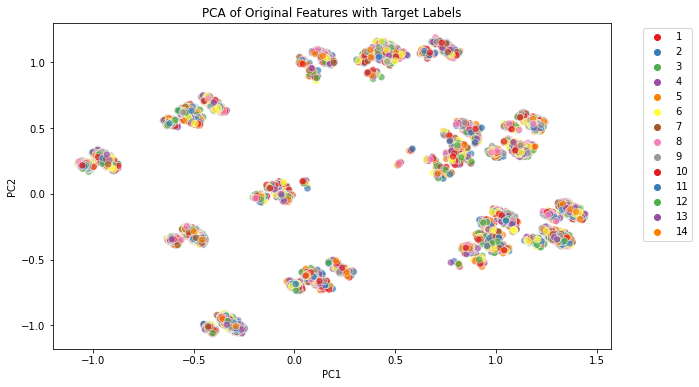

In [141]:
# Plot the clustered data with 'position_at_finish' as labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target_variable', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Original Features with Target Labels')
plt.show()

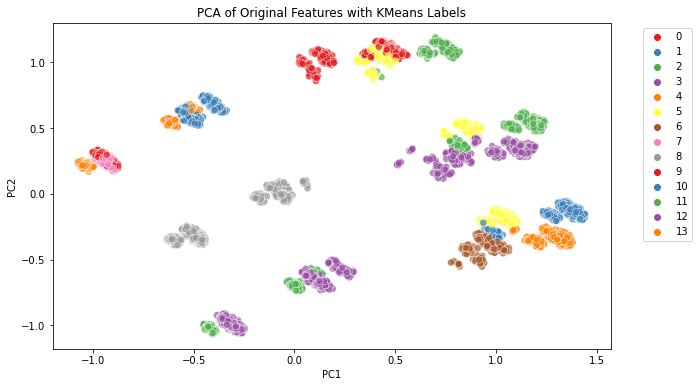

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Labels', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Original Features with KMeans Labels')
plt.show()

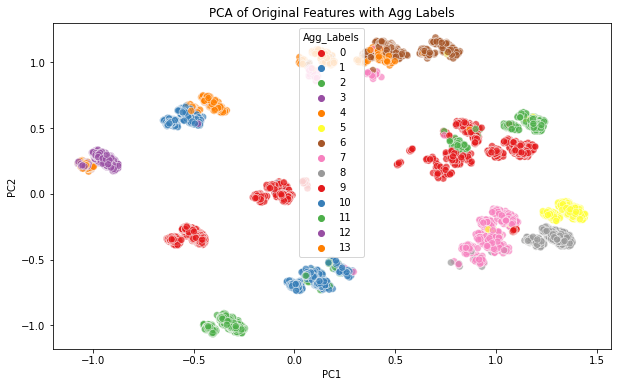

In [143]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Agg_Labels', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Original Features with Agg Labels')
plt.show()

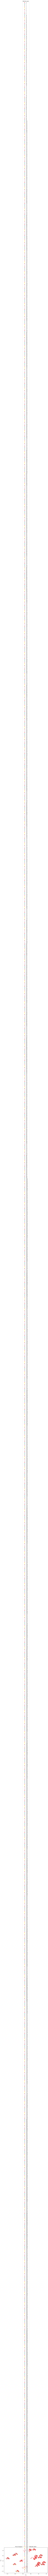

In [124]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Labels', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.title('PCA of Original Features with DBSCAN Labels')
plt.show()

### Try Clustering with lower dimensions

In [144]:
pca = PCA(n_components=15)
reduced_features_df = pd.DataFrame(pca.fit_transform(df_pca_input), columns=[f'PC{i}' for i in range(1, 16)])

In [145]:
num_clusters = 14

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
KMeans_Labels = kmeans.fit_predict(reduced_features_df)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=2)
DBSCAN_Labels = dbscan.fit_predict(reduced_features_df)

# Apply Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=num_clusters)
Agg_Labels = agg_cluster.fit_predict(reduced_features_df)

C:\Users\Heet\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [146]:
reduced_features_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.508878,0.642158,-0.576377,0.605372,-0.424187,0.688438,0.123211,-0.081105,-0.404969,0.131755,0.033078,-0.015985,-0.043771,-0.049128,-0.013316
1,0.350819,1.048257,-0.399250,0.763202,-0.415447,-0.521058,-0.379001,-0.017045,0.001158,0.087140,0.035433,0.997660,-0.052830,0.545095,0.119918
2,1.286885,-0.287930,-0.309462,0.152334,0.193708,-0.199010,-0.816602,0.463421,-0.049545,-0.561303,-0.581522,-0.309685,0.127281,0.577599,0.028850
3,1.176978,-0.354650,-0.443269,0.891580,-0.238291,-0.319191,-0.746899,-0.009659,-0.201235,0.079043,0.066050,0.913110,-0.044240,-0.050304,0.100451
4,0.767177,0.440876,0.439207,0.829423,-0.296487,0.785305,0.971279,-0.363602,-0.586235,0.043149,-0.051341,-0.036443,-0.086979,-0.048527,-0.027849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,0.111335,0.879886,-0.215694,-0.044093,0.119658,0.069415,-0.014402,0.824936,0.222221,0.676256,0.028438,-0.066302,0.030194,-0.034096,0.003059
15077,0.916881,-0.498988,-0.289703,0.073083,0.288924,0.270718,-0.400347,0.850909,0.049533,0.641250,0.045548,0.912949,0.019897,-0.028473,0.098994
15078,1.049155,-0.202270,-0.480612,-0.173541,-0.008003,0.571033,1.044478,0.629820,-0.118927,0.592325,-0.036303,0.005514,-0.008614,0.014590,0.011463
15079,1.050166,-0.203516,-0.484005,-0.173072,-0.013895,0.567851,1.045307,0.632486,-0.113556,0.606653,-0.026551,-0.021059,0.020721,0.009063,0.005802


In [156]:
# Calculate Adjusted Rand Index for Kmeans Clustering
ari = adjusted_rand_score(target_variable, KMeans_Labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.0031087610888668304


In [157]:
# Map KMeans labels to original labels
label_mapping = {}
for kmeans_label in np.unique(KMeans_Labels):
    cluster_indices = (KMeans_Labels == kmeans_label)
    most_frequent_original_label = target_variable[cluster_indices].mode()[0]
    label_mapping[kmeans_label] = most_frequent_original_label

# Create a new column with mapped labels
MappedKMeansLabel = target_variable.map(label_mapping)
MappedKMeansLabel

0          1.0
297        2.0
572        1.0
845        1.0
1125       1.0
          ... 
5226195    2.0
5226482    2.0
5226784    2.0
5227338    2.0
5227892    1.0
Name: position_at_finish, Length: 15081, dtype: float64

In [147]:
# Visualize the clusters using PCA for dimensionality reduction
df_pca_input = reduced_features_df
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_pca_input), columns=['PC1', 'PC2'])

In [159]:
df_pca['target_variable'] = target_variable.to_numpy()
df_pca['KMeans_Labels'] = KMeans_Labels
df_pca['Agg_Labels'] = Agg_Labels
df_pca['DBSCAN_Labels'] = DBSCAN_Labels
df_pca['MappedKMeansLabel'] = MappedKMeansLabel.to_numpy()
df_pca

,PC1,PC2,target_variable,KMeans_Labels,Agg_Labels,DBSCAN_Labels,MappedKMeansLabel
0,-0.508817,0.641747,8,8,2,0,1.0
1,0.350105,1.051881,2,7,9,-1,2.0
2,1.287046,-0.288985,9,5,8,1,1.0
3,1.176169,-0.350083,8,5,8,2,1.0
4,0.767428,0.439340,10,1,3,3,1.0
...,...,...,...,...,...,...,...
15076,0.111119,0.881319,3,2,12,106,2.0
15077,0.915913,-0.493476,3,5,8,587,2.0
15078,1.049157,-0.202466,3,13,6,161,2.0
15079,1.050192,-0.203826,2,13,6,161,2.0


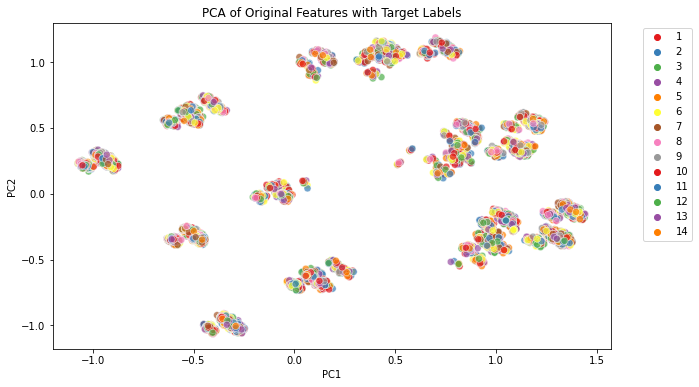

In [151]:
# Plot the clustered data with 'position_at_finish' as labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target_variable', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Original Features with Target Labels')
plt.show()

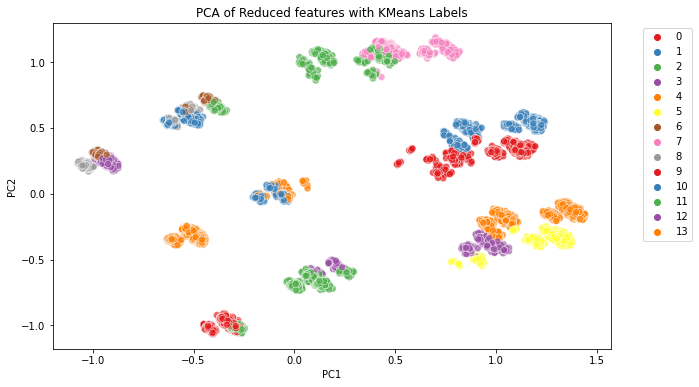

In [150]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Labels', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Reduced features with KMeans Labels')
plt.show()

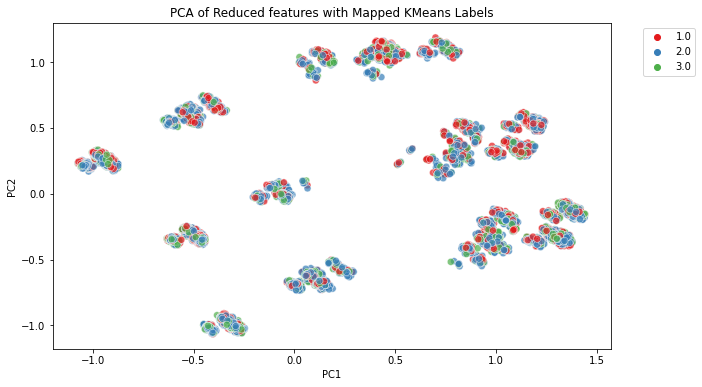

In [160]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='MappedKMeansLabel', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Reduced features with Mapped KMeans Labels')
plt.show()

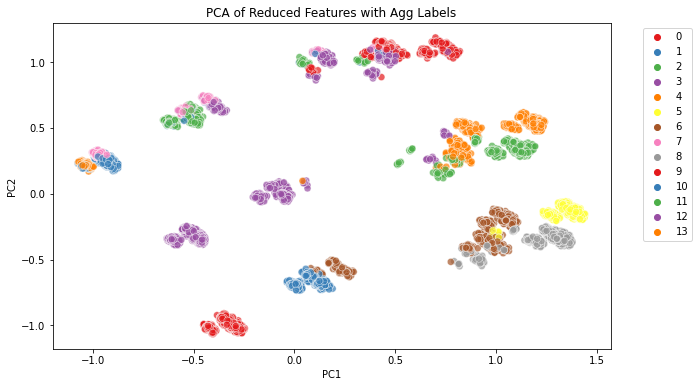

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Agg_Labels', data=df_pca, palette='Set1', s = 50, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('PCA of Reduced Features with Agg Labels')
plt.show()